In [1]:
import pandas as pd

df_peugot_1 = pd.read_csv("Dataset/peugeot_207_01.csv", delimiter=';')
df_peugot_2 = pd.read_csv("Dataset/peugeot_207_02.csv", delimiter=';')

df_corsa_1 = pd.read_csv("Dataset/opel_corsa_01.csv", delimiter=';')
df_corsa_2 = pd.read_csv("Dataset/opel_corsa_02.csv", delimiter=';')



df_new = pd.DataFrame(columns=list(df_corsa_1.columns))
print(df_new.head(5))

df_new = pd.concat([df_peugot_1, df_peugot_2, df_corsa_1, df_corsa_2], axis=0)
print(df_new.shape)

Empty DataFrame
Columns: [AltitudeVariation, VehicleSpeedInstantaneous, VehicleSpeedAverage, VehicleSpeedVariance, VehicleSpeedVariation, LongitudinalAcceleration, EngineLoad, EngineCoolantTemperature, ManifoldAbsolutePressure, EngineRPM, MassAirFlow, IntakeAirTemperature, VerticalAcceleration, FuelConsumptionAverage, roadSurface, traffic, drivingStyle]
Index: []
(24957, 17)


In [2]:
print(df_peugot_1.shape)
print(df_peugot_2.shape)
print(df_corsa_1.shape)
print(df_corsa_2.shape)

(8614, 17)
(4623, 17)
(7392, 17)
(4328, 17)


In [3]:
df_new.tail(5)

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
4323,"-2,800003052","64,17630005","57,46968689","76,34624122","-0,90071869","0,305","17,25490189",83.0,108.0,2009,"14,35999966",18.0,"-0,0039","8,389317513",SmoothCondition,LowCongestionCondition,EvenPaceStyle
4324,"-2,800003052","63,27557755","57,61605384","76,7456589","-0,9007225","0,383","20,7843132",83.0,109.0,1996,"13,82999992",18.0,"0,0234","8,357813835",SmoothCondition,LowCongestionCondition,EvenPaceStyle
4325,"-2,800003052","62,60003281","57,75491473","76,95711958","-0,67554474","0,437","18,8235302",82.0,108.0,1982,"13,81000042",18.0,"0,0469","8,332449913",SmoothCondition,LowCongestionCondition,EvenPaceStyle
4326,"-2,800003052","62,60003281","57,85999864","77,30764933",0,"0,496","11,76470566",82.0,106.0,1952,"13,38000011",18.0,"0,0586","8,305366516",SmoothCondition,LowCongestionCondition,EvenPaceStyle
4327,"-2,800003052","61,47413635","57,96508261","77,3950813","-1,12589646","0,543","3,529411793",82.0,105.0,1924,"12,51000023",18.0,"0,0273","8,27575016",SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24957 entries, 0 to 4327
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AltitudeVariation          24777 non-null  object 
 1   VehicleSpeedInstantaneous  24913 non-null  object 
 2   VehicleSpeedAverage        23775 non-null  object 
 3   VehicleSpeedVariance       23775 non-null  object 
 4   VehicleSpeedVariation      24769 non-null  object 
 5   LongitudinalAcceleration   24957 non-null  object 
 6   EngineLoad                 24952 non-null  object 
 7   EngineCoolantTemperature   24952 non-null  float64
 8   ManifoldAbsolutePressure   24952 non-null  float64
 9   EngineRPM                  24952 non-null  object 
 10  MassAirFlow                24952 non-null  object 
 11  IntakeAirTemperature       24952 non-null  float64
 12  VerticalAcceleration       24957 non-null  object 
 13  FuelConsumptionAverage     24671 non-null  object 
 

In [5]:
df_new.describe()
df_new = df_new.fillna(0)

In [6]:
def process_col_values(df_new, col_name):
    col_list = list(df_new[col_name])
    processed_value = []
    for each_value in col_list:
        if each_value == 0:
            processed_value.append(0)
        elif type(each_value) == str:
            processed_value.append(float(each_value.replace(",",".")))
        else:
            processed_value.append(float(each_value))
    
    df_new[col_name] = processed_value

In [7]:
cols_to_change = ["AltitudeVariation", "VehicleSpeedInstantaneous", "VehicleSpeedAverage", "VehicleSpeedVariance", "VehicleSpeedVariation",
                 "LongitudinalAcceleration", "EngineLoad", "EngineRPM", "MassAirFlow", "VerticalAcceleration", "FuelConsumptionAverage"]

for col in cols_to_change:
    print(col)
    process_col_values(df_new, col)

AltitudeVariation
VehicleSpeedInstantaneous
VehicleSpeedAverage
VehicleSpeedVariance
VehicleSpeedVariation
LongitudinalAcceleration
EngineLoad
EngineRPM
MassAirFlow
VerticalAcceleration
FuelConsumptionAverage


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24957 entries, 0 to 4327
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AltitudeVariation          24957 non-null  float64
 1   VehicleSpeedInstantaneous  24957 non-null  float64
 2   VehicleSpeedAverage        24957 non-null  float64
 3   VehicleSpeedVariance       24957 non-null  float64
 4   VehicleSpeedVariation      24957 non-null  float64
 5   LongitudinalAcceleration   24957 non-null  float64
 6   EngineLoad                 24957 non-null  float64
 7   EngineCoolantTemperature   24957 non-null  float64
 8   ManifoldAbsolutePressure   24957 non-null  float64
 9   EngineRPM                  24957 non-null  float64
 10  MassAirFlow                24957 non-null  float64
 11  IntakeAirTemperature       24957 non-null  float64
 12  VerticalAcceleration       24957 non-null  float64
 13  FuelConsumptionAverage     24957 non-null  float64
 

In [9]:
df_new.tail()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
4323,-2.800003,64.176300,57.469687,76.346241,-0.900719,0.305,17.254902,83.0,108.0,2009.0,14.36,18.0,-0.0039,8.389318,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4324,-2.800003,63.275578,57.616054,76.745659,-0.900722,0.383,20.784313,83.0,109.0,1996.0,13.83,18.0,0.0234,8.357814,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4325,-2.800003,62.600033,57.754915,76.957120,-0.675545,0.437,18.823530,82.0,108.0,1982.0,13.81,18.0,0.0469,8.332450,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4326,-2.800003,62.600033,57.859999,77.307649,0.000000,0.496,11.764706,82.0,106.0,1952.0,13.38,18.0,0.0586,8.305367,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4327,-2.800003,61.474136,57.965083,77.395081,-1.125896,0.543,3.529412,82.0,105.0,1924.0,12.51,18.0,0.0273,8.275750,SmoothCondition,LowCongestionCondition,EvenPaceStyle


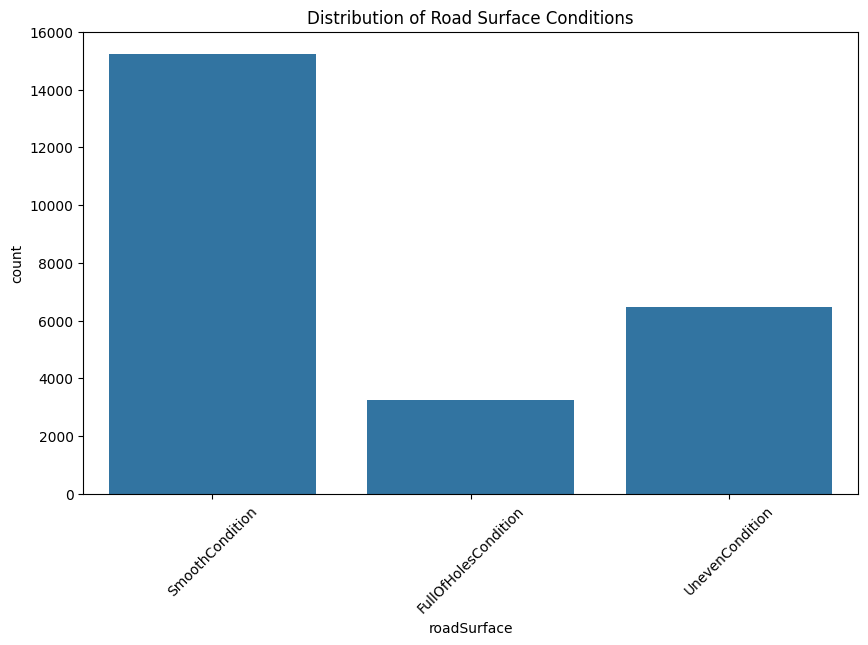

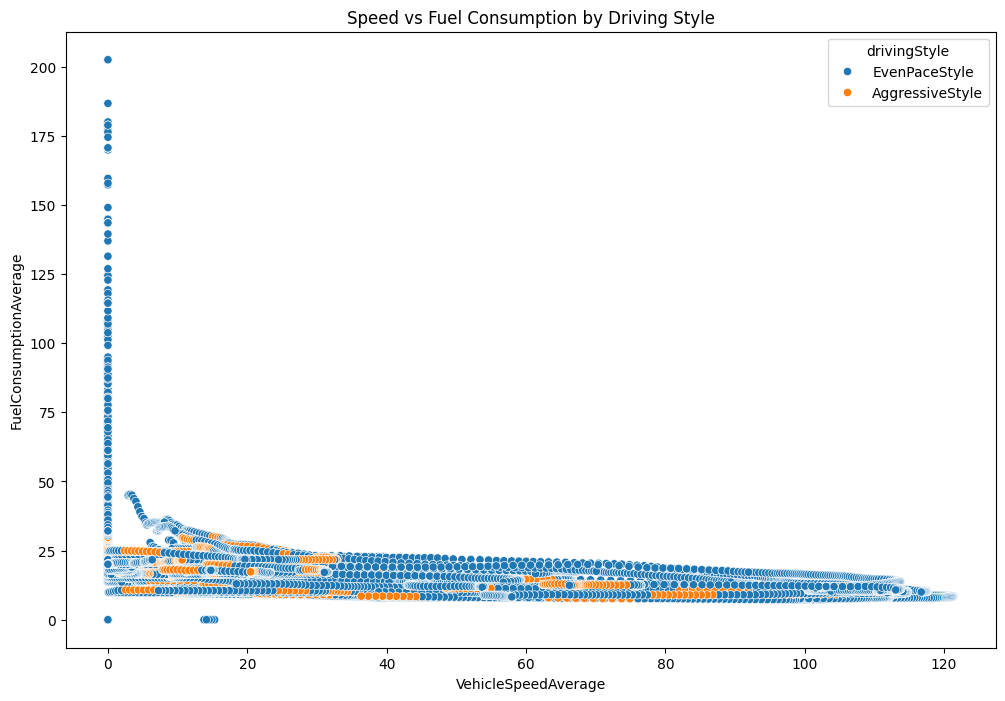

In [35]:
# Visualize distribution of road conditions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df_new, x='roadSurface')
plt.title('Distribution of Road Surface Conditions')
plt.xticks(rotation=45)
plt.show()

# Visualize relationships between key features
plt.figure(figsize=(12,8)) 
sns.scatterplot(data=df_new, x='VehicleSpeedAverage', y='FuelConsumptionAverage', hue='drivingStyle')
plt.title('Speed vs Fuel Consumption by Driving Style')
plt.show()

In [10]:
road_surf_unique = list(df_new["roadSurface"].unique())
traffic_unique = list(df_new["traffic"].unique())
drivingStyle_unique = list(df_new["drivingStyle"].unique())

print(road_surf_unique)
print(traffic_unique)
print(drivingStyle_unique)

['SmoothCondition', 'FullOfHolesCondition', 'UnevenCondition']
['LowCongestionCondition', 'NormalCongestionCondition', 'HighCongestionCondition']
['EvenPaceStyle', 'AggressiveStyle']


In [33]:
final_list = []
final_list.extend(road_surf_unique)
final_list.extend(road_surf_unique)
final_list.extend(road_surf_unique)
print(final_list)

['SmoothCondition', 'FullOfHolesCondition', 'UnevenCondition', 'SmoothCondition', 'FullOfHolesCondition', 'UnevenCondition', 'SmoothCondition', 'FullOfHolesCondition', 'UnevenCondition']


In [12]:
one_hot_encoding = pd.get_dummies(df_new[['roadSurface', "traffic", "drivingStyle"]])
one_hot_encoding

,roadSurface_FullOfHolesCondition,roadSurface_SmoothCondition,roadSurface_UnevenCondition,traffic_HighCongestionCondition,traffic_LowCongestionCondition,traffic_NormalCongestionCondition,drivingStyle_AggressiveStyle,drivingStyle_EvenPaceStyle
0,False,True,False,False,True,False,False,True
1,False,True,False,False,True,False,False,True
2,False,True,False,False,True,False,False,True
3,False,True,False,False,True,False,False,True
4,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...
4323,False,True,False,False,True,False,False,True
4324,False,True,False,False,True,False,False,True
4325,False,True,False,False,True,False,False,True
4326,False,True,False,False,True,False,False,True


In [13]:
one_hot_encoding['Target']= one_hot_encoding.values.tolist()
one_hot_encoding

,roadSurface_FullOfHolesCondition,roadSurface_SmoothCondition,roadSurface_UnevenCondition,traffic_HighCongestionCondition,traffic_LowCongestionCondition,traffic_NormalCongestionCondition,drivingStyle_AggressiveStyle,drivingStyle_EvenPaceStyle,Target
0,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
1,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
2,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
3,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
4,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
...,...,...,...,...,...,...,...,...,...
4323,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
4324,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
4325,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."
4326,False,True,False,False,True,False,False,True,"[False, True, False, False, True, False, False..."


In [14]:
df_processed = df_new.drop(["roadSurface", "traffic", "drivingStyle"], axis = 1)
df_processed['Target'] = one_hot_encoding['Target']
df_processed

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0418,36.470589,28.0,100.0,802.5,10.30,14.0,0.0118,0.000000,"[False, True, False, False, True, False, False..."
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0713,36.470589,28.0,100.0,802.5,10.30,14.0,-0.0023,0.000000,"[False, True, False, False, True, False, False..."
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0952,36.470589,29.0,100.0,798.5,10.24,14.0,-0.0135,0.000000,"[False, True, False, False, True, False, False..."
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.1136,36.470589,29.0,100.0,798.5,10.24,15.0,-0.0161,0.000000,"[False, True, False, False, True, False, False..."
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.1274,36.470589,29.0,100.0,804.5,10.36,15.0,-0.0160,0.000000,"[False, True, False, False, True, False, False..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,-2.800003,64.176300,57.469687,76.346241,-0.900719,0.3050,17.254902,83.0,108.0,2009.0,14.36,18.0,-0.0039,8.389318,"[False, True, False, False, True, False, False..."
4324,-2.800003,63.275578,57.616054,76.745659,-0.900722,0.3830,20.784313,83.0,109.0,1996.0,13.83,18.0,0.0234,8.357814,"[False, True, False, False, True, False, False..."
4325,-2.800003,62.600033,57.754915,76.957120,-0.675545,0.4370,18.823530,82.0,108.0,1982.0,13.81,18.0,0.0469,8.332450,"[False, True, False, False, True, False, False..."
4326,-2.800003,62.600033,57.859999,77.307649,0.000000,0.4960,11.764706,82.0,106.0,1952.0,13.38,18.0,0.0586,8.305367,"[False, True, False, False, True, False, False..."


In [15]:
from sklearn.utils import shuffle
df_processed = shuffle(df_processed)

In [17]:
import numpy as np
x_train = df_processed.drop(['Target'], axis=1)
y_train = np.array(df_processed['Target'].values.tolist())
print(x_train.shape)
print(y_train.shape)

(24957, 14)
(24957, 8)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19965, 14) (4992, 14) (19965, 8) (4992, 8)


In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit(X_train)

x_train_transformed = min_max_scaler.transform(X_train)
x_test_transformed = min_max_scaler.transform(X_test)


print(x_train_transformed.shape)
print(x_test_transformed.shape)

(19965, 14)
(4992, 14)


In [21]:
print(y_train.shape)
print(y_test.shape)

(19965, 8)
(4992, 8)


In [22]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train_transformed, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [23]:
y_test_predicted = multi_target_forest.predict(x_test_transformed)
y_test_predicted

array([[False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       ...,
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True]])

In [24]:
print(y_test.shape)
print(y_test_predicted.shape)

(4992, 8)
(4992, 8)


In [25]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_test_predicted)
score

0.9164663461538461

In [28]:
from sklearn.tree import DecisionTreeClassifier

forest = DecisionTreeClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train_transformed, y_train)

y_test_predicted = multi_target_forest.predict(x_test_transformed)
score = accuracy_score(y_test, y_test_predicted)
print(score)

0.8347355769230769


In [29]:
cols = list(one_hot_encoding.columns)[:-1]

ordered_values =[]
for i in cols:
    ordered_values.append(i.split("_")[1])
    
print(ordered_values)
print(len(ordered_values))

['FullOfHolesCondition', 'SmoothCondition', 'UnevenCondition', 'HighCongestionCondition', 'LowCongestionCondition', 'NormalCongestionCondition', 'AggressiveStyle', 'EvenPaceStyle']
8


In [30]:
print(y_test_predicted.shape)

(4992, 8)


In [31]:
def convert_results(y_test_predicted, ordered_values):
    final_prediction = []
    for each_prediction in y_test_predicted:
        sub_list = []
        for i, j in enumerate(list(each_prediction)):
            if j == 1:
                sub_list.append(ordered_values[i])
        final_prediction.append(sub_list)
    return final_prediction


final_prediction = convert_results(y_test_predicted, ordered_values)
final_prediction[:10]

[['SmoothCondition',
  'LowCongestionCondition',
  'NormalCongestionCondition',
  'EvenPaceStyle'],
 ['SmoothCondition', 'LowCongestionCondition', 'EvenPaceStyle'],
 ['SmoothCondition', 'LowCongestionCondition', 'EvenPaceStyle'],
 ['SmoothCondition', 'LowCongestionCondition', 'EvenPaceStyle'],
 ['LowCongestionCondition', 'EvenPaceStyle'],
 ['SmoothCondition', 'LowCongestionCondition', 'EvenPaceStyle'],
 ['FullOfHolesCondition', 'LowCongestionCondition', 'AggressiveStyle'],
 ['UnevenCondition', 'NormalCongestionCondition', 'EvenPaceStyle'],
 ['FullOfHolesCondition', 'HighCongestionCondition', 'EvenPaceStyle'],
 ['SmoothCondition', 'LowCongestionCondition', 'EvenPaceStyle']]

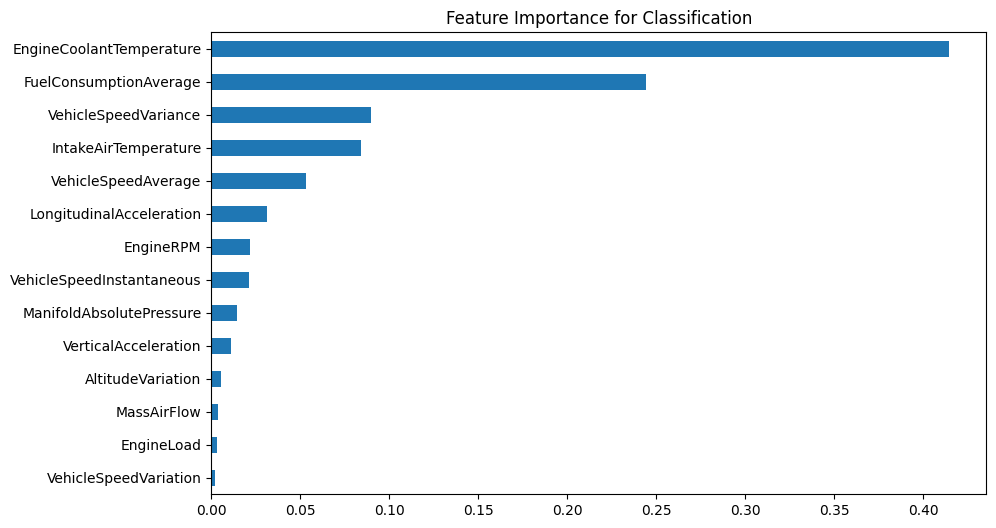

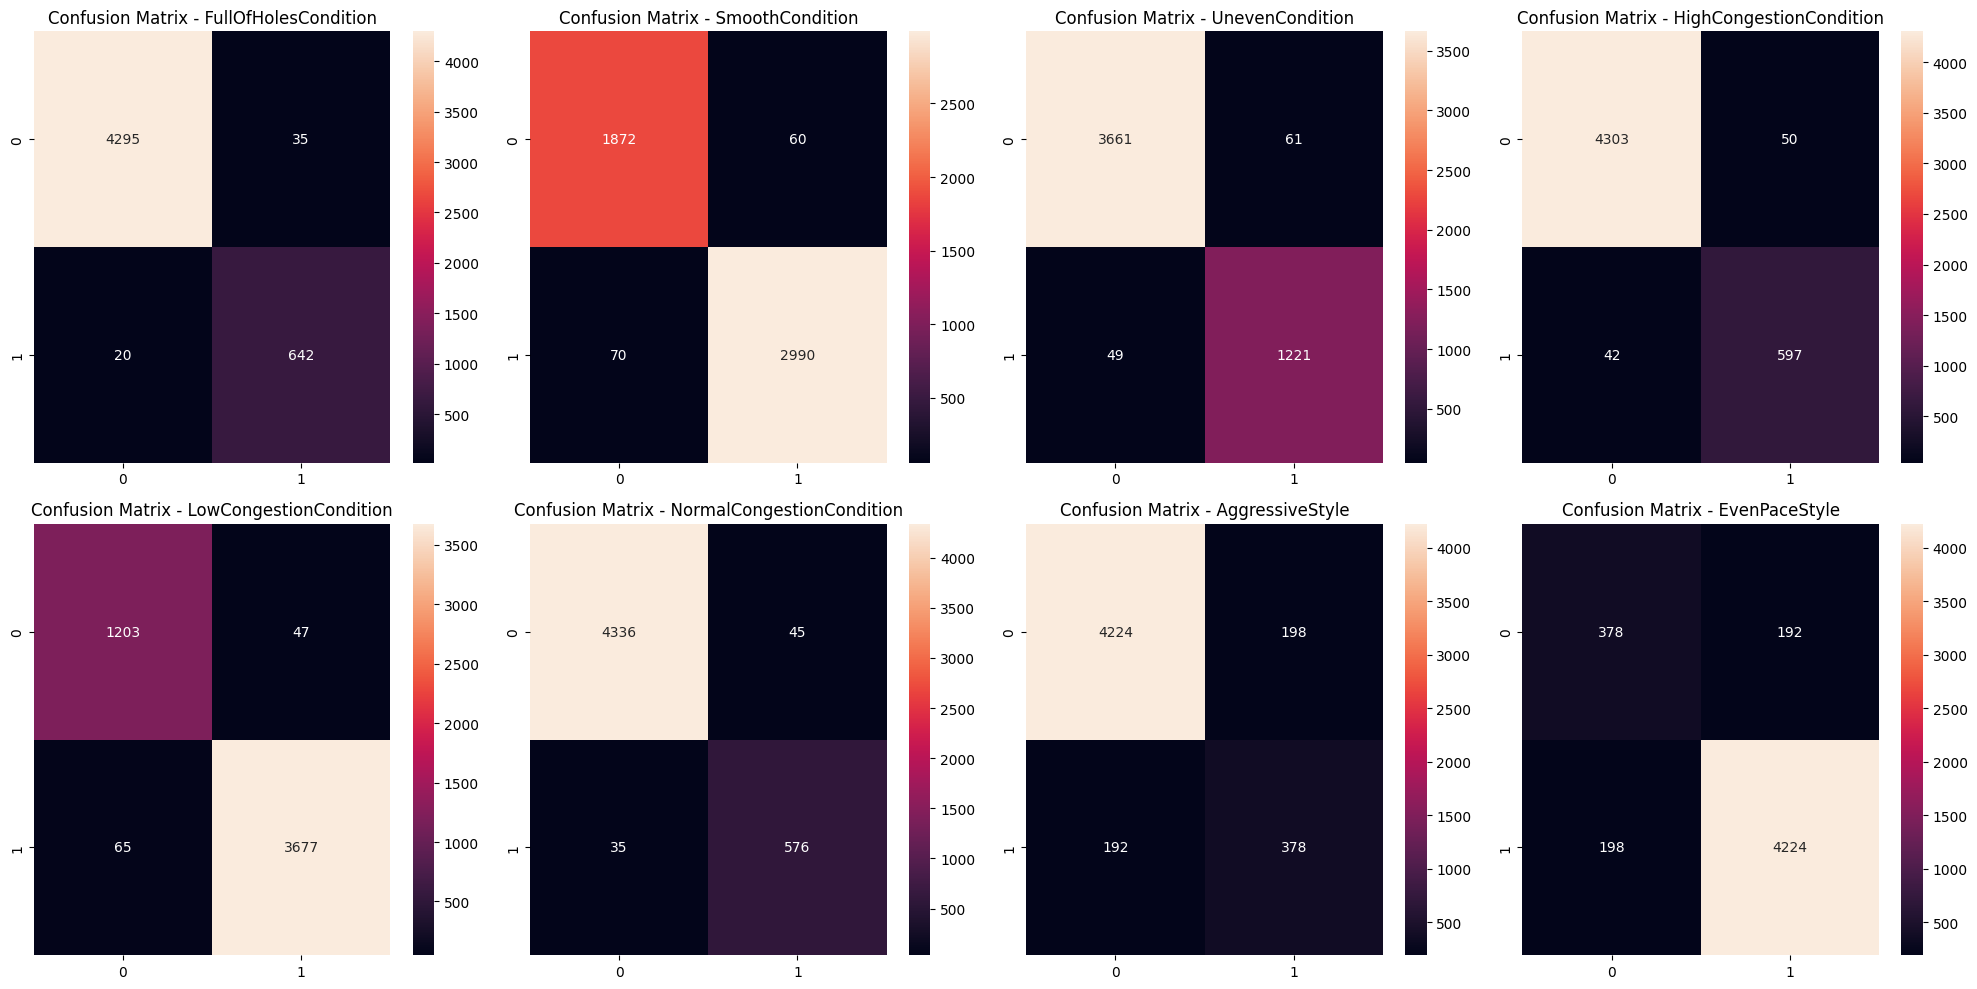

In [36]:
# Visualize feature importance
importances = multi_target_forest.estimators_[0].feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
plt.figure(figsize=(10,6))
feat_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance for Classification')
plt.show()

# Plot confusion matrices
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix for each target
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.ravel()
for idx, target in enumerate(ordered_values):
    cm = confusion_matrix(y_test[:,idx], y_test_predicted[:,idx])
    sns.heatmap(cm, annot=True, ax=axes[idx], fmt='d')
    axes[idx].set_title(f'Confusion Matrix - {target}')
plt.tight_layout()
plt.show()

In [37]:
# Print classification report
from sklearn.metrics import classification_report
print("Model Performance Summary:")
for idx, target in enumerate(ordered_values):
    print(f"\nResults for {target}:")
    print(classification_report(y_test[:,idx], y_test_predicted[:,idx]))

Model Performance Summary:

Results for FullOfHolesCondition:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      4330
        True       0.95      0.97      0.96       662

    accuracy                           0.99      4992
   macro avg       0.97      0.98      0.98      4992
weighted avg       0.99      0.99      0.99      4992


Results for SmoothCondition:
              precision    recall  f1-score   support

       False       0.96      0.97      0.97      1932
        True       0.98      0.98      0.98      3060

    accuracy                           0.97      4992
   macro avg       0.97      0.97      0.97      4992
weighted avg       0.97      0.97      0.97      4992


Results for UnevenCondition:
              precision    recall  f1-score   support

       False       0.99      0.98      0.99      3722
        True       0.95      0.96      0.96      1270

    accuracy                           0.98      4992
   mac